# 1. Most Commonly Awarded Gender and Top Birth Country

In [117]:
# Loading in required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# DataFrame Loading

nobel_winners_df = pd.read_csv('nobel.csv')


# Instead of working on a Pandas Series after counting birth countries per each winner, 
# I preferrably reset the index to work on on a Pandas DataFrame in order to clearly pick 
# the first row's and column's value via iloc[0:0]:

top_gender = nobel_winners_df["sex"].value_counts().reset_index().iloc[0,0]
top_birth_country = nobel_winners_df["birth_country"].value_counts().reset_index().iloc[0,0]

print(f"The most commonly awarded gender is {top_gender}.")
print(f"The top birth country of the award winners is {top_birth_country}.")


The most commonly awarded gender is Male.
The top birth country of the award winners is United States of America.


# 2. Proportion of US-born Winners per Decade

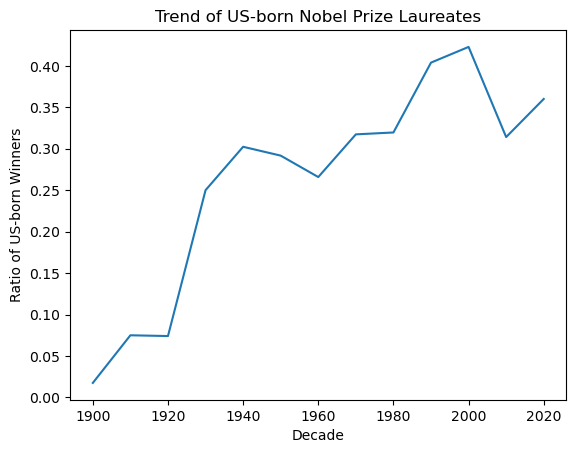

In [118]:
#The three variables below would help me add a new column 'Decade', designed to categorise all data by decades

decade_bins= [1900, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2029]

decade_labels= [1900, 1910, 1920, 1930, 1940,
                1950, 1960, 1970, 1980, 1990,
                2000, 2010, 2020]


nobel_winners_df['decade'] = pd.cut(nobel_winners_df['year'], 
                                    bins=decade_bins, labels=decade_labels)


# Calculating the ratio below by counting all US-born winners per decade and dividing it by the total:

us_winners = nobel_winners_df[nobel_winners_df['birth_country'] == 
                              "United States of America"].groupby("decade").agg({"prize":"count"})

non_us_winners = nobel_winners_df[nobel_winners_df['birth_country'] 
                                  != "United States of America"].groupby("decade").agg({"prize":"count"})                                                                                                                

usa_born_winner_ratio_data = (us_winners / (us_winners + non_us_winners))


prop_usa_winners = usa_born_winner_ratio_data.reset_index().rename(columns={
    'prize':'usa_born_winner_ratio'}) #Renaming the Count column 

prop_usa_winners['decade'] = prop_usa_winners['decade'].astype(int) #INT casting the Decade column


# Data Visualisation

us_winners_lineplot = sns.lineplot(data=prop_usa_winners, x='decade', y='usa_born_winner_ratio')
plt.title('Trend of US-born Nobel Prize Laureates')
plt.xlabel('Decade')
plt.ylabel('Ratio of US-born Winners')
plt.show()


# 3. Proportion of Female Laureates per Decade and Category

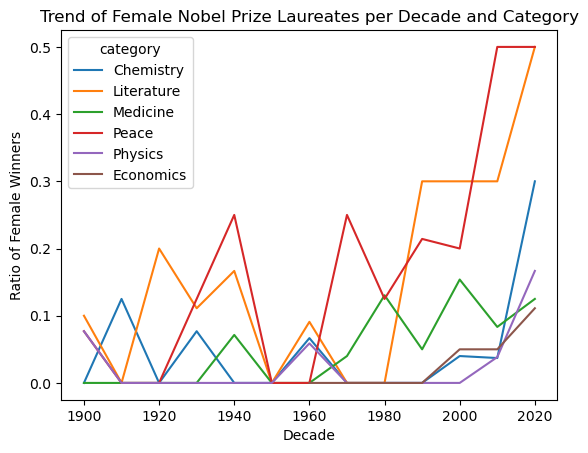

In [119]:
# Calculating the ratio below by counting all female winners per decade and category and dividing it by the total:

female_winners = nobel_winners_df[nobel_winners_df['sex'] == 'Female'].groupby(['decade',
                                                                                'category']).agg({"prize":"count"})

male_winners = nobel_winners_df[nobel_winners_df['sex'] == 'Male'].groupby(['decade',
                                                                            'category']).agg({"prize":"count"})


female_winner_ratio = (female_winners / (female_winners + male_winners))

#Renaming the Count column 
prop_female_winners = pd.DataFrame(female_winner_ratio).reset_index().rename(columns={'prize':'female_winner'})

#Dropping all rows having null value
prop_female_winners.dropna(inplace=True)


female_winners_visual = sns.lineplot(data=prop_female_winners, x='decade', y='female_winner', 
                                     hue='category')

plt.title('Trend of Female Nobel Prize Laureates per Decade and Category')
plt.xlabel('Decade')
plt.ylabel('Ratio of Female Winners')
plt.show()

# 4. First woman who received a Nobel Prize and for which category

In [120]:
#Subsetting all female winners by year, full_name and category attributes only

female_nobel_winners = nobel_winners_df[nobel_winners_df['sex'] == 'Female'][
    ['year','full_name','category']].reset_index(drop=True)


#Integer-location based indexing to find what is requested and to assign them to our variables

first_woman_name = female_nobel_winners.iloc[0,1]
first_woman_category = female_nobel_winners.iloc[0,2]

print(f"{first_woman_name} was the first woman to receive a Nobel Prize in the category of {first_woman_category}.")


Marie Curie, née Sklodowska was the first woman to receive a Nobel Prize in the category of Physics.


# 5. Individuals who have won multiple Nobel Prizes

In [121]:
# Our counter helps us count the number of occurrances of each individual/org and stores it on a Panda Series

our_counter = nobel_winners_df['full_name'].value_counts()

# If the occurrance us more than once, then we conclude that such records represent multiple-times award winners

multiple_award_winners = our_counter[our_counter >= 2].index #We print out the index value for records meeting the condition
repeat_list = list(multiple_award_winners)

repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']